In [43]:
import pandas as pd
from datasets import Dataset, load_dataset, load_from_disk
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from PIL import PngImagePlugin
LARGE_ENOUGH_NUMBER = 100
PngImagePlugin.MAX_TEXT_CHUNK = LARGE_ENOUGH_NUMBER * (1024**2)

# Import Data

In [44]:
from datasets import Dataset, load_dataset

dataset = load_from_disk( r"C:\Users\shirs\Desktop\Image_Captioning_and_CLIP_Model_Deployment\Image_Captioning_GCC_Embeddings_1k") # split="train"
dataset = dataset["train"]
dataset

Dataset({
    features: ['caption', 'image_data', 'image_embeddings', 'text_embeddings'],
    num_rows: 1000
})

# Display Data

In [45]:
# for index in range(5,10):
#     # Display the image using matplotlib
#     image_array = dataset[index]["image_data"]
#     caption = dataset[index]["caption"]
#     plt.imshow(image_array)
#     plt.axis('off')  # Turn off axes
#     print("\n\n\n Caption: ", caption )
#     plt.show()

In [46]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import CLIPProcessor, CLIPModel, CLIPImageProcessor
import torchvision.transforms as transforms

# Load pre-trained CLIP model and tokenizer
base_model_name =  "openai/clip-vit-base-patch16" # "shirsh10mall/Fine_Tuned_CLIP_Model" # openai/clip-vit-base-patch16 "openai/clip-vit-large-patch14" 
model = CLIPModel.from_pretrained(r"C:\Users\shirs\Desktop\Image_Captioning_and_CLIP_Model_Deployment\Fine_Tuned_CLIP_Model")
tokenizer = CLIPProcessor.from_pretrained(base_model_name)
processor = CLIPImageProcessor.from_pretrained(base_model_name)

In [47]:
dataset.add_faiss_index(column='image_embeddings')
dataset.save_faiss_index('image_embeddings', 'image_embeddings.faiss')

100%|██████████| 1/1 [00:00<00:00, 29.43it/s]


In [48]:
# Function to perform image retrieval

max_length = 32

def image_retrieval_sequentially(query, counter_n=3, display=False ):
    # Encode the query text
    query_input = tokenizer(query, padding='max_length', truncation=True, max_length=max_length, return_tensors='pt')
    query_embedding = model.get_text_features(**query_input)
    print(  )
    # Perform image retrieval
    scores, retrieved_examples = dataset.get_nearest_examples('image_embeddings', query_embedding[0].detach().numpy(), k=counter_n)

    if display:
        # print("\n\n Similar Text :- \n\t", "\n\t".join(sorted_text))
        for i in range(counter_n):
            image = retrieved_examples["image_data"][i]
            plt.imshow(image)
            plt.axis('off')  # Turn off axes
            print("\n\n\n", retrieved_examples["caption"][i] )
            plt.show()

    return retrieved_examples  # sorted_text  |  Return top 3 similar images





 master playing with his little golden retriever dog on the lawn


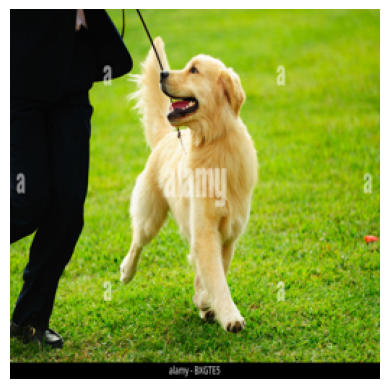




 dog with his puppies in the winter park


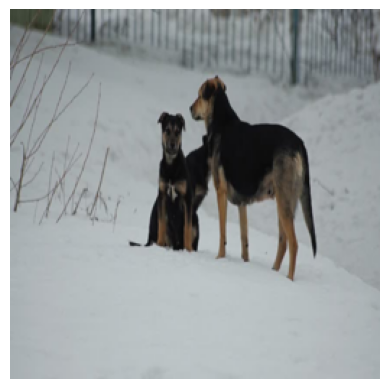




 cute dog with leash is waiting for walk in front of the house


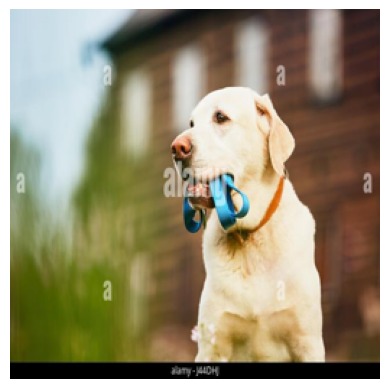

In [49]:
retrieved_examples = image_retrieval_sequentially("dogs", counter_n=3, display=True )

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256>]

In [22]:
# # Function to perform image retrieval

# def calculate_similarity_scores(text_encoding,image_embeddings):
#     similarity_score = torch.cosine_similarity(text_encoding, torch.tensor(image_embeddings), dim=-1).item()
#     return similarity_score

# max_length = 32

# def image_retrieval_sequentially(query, dataset, counter_n=3, display=False ):
#     # Encode the query text
#     query_input = tokenizer(query, padding='max_length', truncation=True, max_length=max_length, return_tensors='pt')
#     query_encoding = model.get_text_features(**query_input)
    
#     # Calculate similarity scores between query and images
#     dataset = dataset.map( lambda instance: { "image_similarity_scores": calculate_similarity_scores(query_encoding,instance["image_embeddings"]) } )

#     # Sort images by similarity scores
#     counter_n = 0
#     sorted_images = []
#     for index in torch.argsort(torch.tensor(dataset["image_similarity_scores"]), descending=True):
#         counter_n = counter_n + 1
#         sorted_images.append( dataset[int(index)]["image_data"] )
#         if counter_n>=3:
#             break

#     if display:
#         # print("\n\n Similar Text :- \n\t", "\n\t".join(sorted_text))

#         for i, image in enumerate(sorted_images):
#             plt.imshow(image)
#             plt.axis('off')  # Turn off axes
#             print("\n\n\n" )
#             plt.show()

#     return sorted_images, dataset  # sorted_text  |  Return top 3 similar images